In [46]:
import pandas as pd
import numpy as np
#import pyodbc


#generate SQL string===========================================================
#dev_list = ['A1','B2']
#
#def str_gen(dev_list):
#    sql_str = ''
#    
#    for wafer in range(len(dev_list)):
#        if wafer == 0:
#            sql_str =sql_str + f"DEV_SN LIKE '%{dev_list[wafer]}%'"
#        else:
#            sql_str =sql_str + f" OR DEV_SN LIKE '%{dev_list[wafer]}%'"
#    return sql_str
 

#SQL connection and df generation==============================================
#conn = pyodbc.connect('DRIVER={SQL Server};SERVER=++SERVER NAME++;DATABASE=++DATABASE++;Integrated Security=True;Connection Timeout=3')
#
#SQL = f"select * from [TABLE]  WHERE ++OTHER++ LIKE '%SOMETHING%' AND {str_gen(dev_list)}"
#
#df = pd.read_sql(SQL, conn)
#==============================================================================    



#==============================================================================
#CSV read
df=pd.read_csv('Example_Data_CSV2.csv')


#initialize df and lists=======================================================
sub = []
sub_dev = []
col_list = []
dfsub = pd.DataFrame()
dfsub2 = pd.DataFrame()
dfout = pd.DataFrame()
#list of times to interpolate
time_list= [1.5,3.6,11.5]
#list of col to subtract
data_list = ['DATA_A','DATA_B','DATA_C']
#subtracted values
sub_list = ['DATA_A_SUB','DATA_B_SUB','DATA_C_SUB']


#list of all unique SNs and columns============================================
dev = df['DEV_SN'].unique()

print(dev)


#lists for analysis============================================================



#need a function to filter data if max time in series is < max(time_list)======
for i in dev:
    dfin = df.loc[(df['DEV_SN']== i)]
    if dfin['TIME'].max() > 1:
        sub_dev.append(i)
        
#==============================================================================
        

### add a row that indicates max TIME, these are used to filter the data later
df['MAX1.5']=''
df['MAX3.6']=''
df['MAX11.5']=''
for i in sub_dev:
    dfin = df.loc[(df['DEV_SN']== i)]
    for i in dfin.index:
        df.at[i, 'MAX1.5'] = 1.5 if dfin['TIME'].max() > 1.5 else 0
        df.at[i, 'MAX3.6'] = 3.6 if dfin['TIME'].max() > 3.6 else 0
        df.at[i, 'MAX11.5'] = 11.5 if dfin['TIME'].max() > 11.5 else 0
    
# create a col_list used later for ffill()           
for col in df.columns:
    col_list.append(col)

for col in data_list:
    col_list.remove(col)

        
#loop to do polynomial fit to find values======================================

print('===========fit loop===================================================')
for i in sub_dev:
    addrow_list = []
    for t in time_list:
        row = {'TIME':t, 'DEV_SN':i}
        
        for data in data_list:
            dfin = df.loc[(df['DEV_SN']== i)]
            #remove all the rows with any values of 999
            dfin=dfin[dfin.DATA_A != 999]
            x=dfin['TIME'].values
            y=dfin[data].values
            #only fit if there are more than one data point
            if len(y) > 1:
                z=np.polyfit(x,y,3)
                ynew=np.polyval(z,t)
                row[data]=ynew
        addrow_list.append(row)            
    add = dfin.append(addrow_list, ignore_index=True)
    dfsub = dfsub.append(add)
    
#loop to do polynomial fit to find values======================================



# loop to do the subtraction===================================================
print('=============Subtraction loop=========================================')
for i in sub_dev:
    dfin2 = dfsub.loc[dfsub['DEV_SN']== i].copy()

    #do the subtraction and set values in subtraction col
    for s,d in zip(sub_list,data_list):
        dfin2[s]= dfin2[d] - dfin2.loc[dfin2.TIME.idxmin() ,d]

    #fill in empty values in the new fit rows with their previous values, for instance DEV_SN
    for i in col_list:
        
        dfin2[i]=dfin2[i].ffill()


    #append to df
    dfsub2 = dfsub2.append(dfin2)

# export data to csv===========================================================
    
dfsub2.to_csv(r'C:\Users\jiveland\Desktop\python\python_project\data_example\export_dataframe_EXAMPLE.csv', index = None, header=True)

['A11' 'B12' 'C13']
===========fit loop===================================================
=============Subtraction loop=========================================


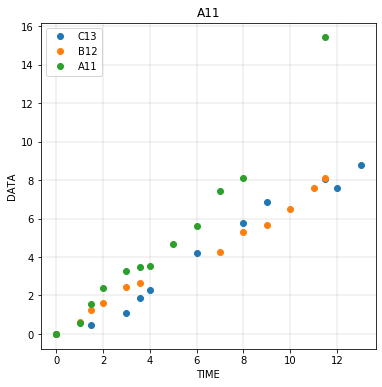

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('export_dataframe_EXAMPLE.csv')

dev_list=['C13','B12','A11']

# x_list=['TIME','TIME']
# y_list=['DATA_A','DATA_A_SUB']

x_list=['TIME']
y_list=['DATA_A_SUB']

#iterate through the dev in the dev_list
for dev in dev_list:
    #create dfin for each dev
    dfin = df.loc[(df['DEV_SN']== dev)]
    dfin.sort_values(by=['TIME'], inplace=False)
   
    #iterate thorugh the list of plots in the x_list and y_list
    for x,y in zip(x_list,y_list):
        #iterate through the hours

        #select on data for the ith hour
        
        
        plt.plot(x, y, data=dfin, label=f'{dev}', linestyle='none',marker='o')
        plt.title(f'{dev}')
        plt.xlabel(x)
        plt.ylabel('DATA')
        plt.grid(which='both',axis='both',color='black', linestyle='-', linewidth=0.1)
        plt.gca().legend(loc='best')
        plt.gcf().set_size_inches(6, 6)
       
        
plt.savefig(f'{dev}_{y}.png',dpi=200)
plt.show()

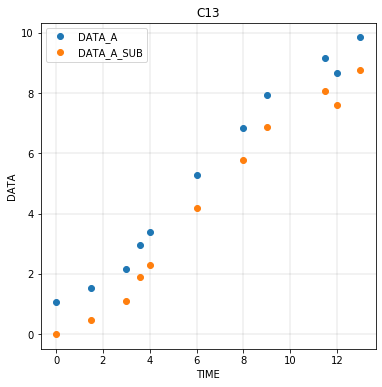

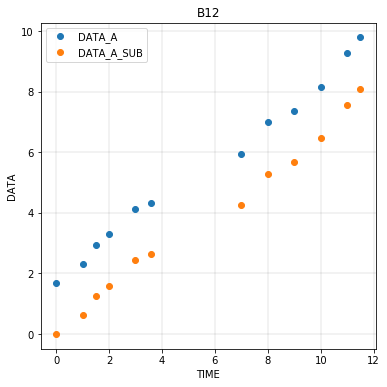

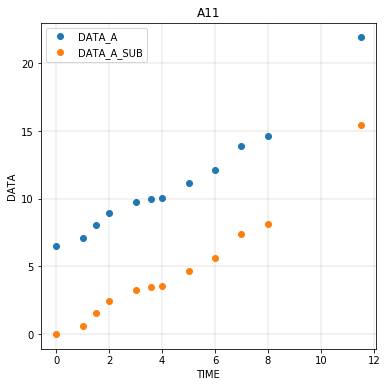

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('export_dataframe_EXAMPLE.csv')

dev_list=['C13','B12','A11']

x_list=['TIME','TIME']
y_list=['DATA_A','DATA_A_SUB']

# x_list=['TIME']
# y_list=['DATA_A']

#iterate through the dev in the dev_list
for dev in dev_list:
    #create dfin for each dev
    dfin = df.loc[(df['DEV_SN']== dev)]
    dfin.sort_values(by=['TIME'], inplace=False)
   
    #iterate thorugh the list of plots in the x_list and y_list
    for x,y in zip(x_list,y_list):
        #iterate through the hours

        #select on data for the ith hour
        
        
        plt.plot(x, y, data=dfin, label=f'{y}', linestyle='none',marker='o')
        plt.title(f'{dev}')
        plt.xlabel(x)
        plt.ylabel('DATA')
        plt.grid(which='both',axis='both',color='black', linestyle='-', linewidth=0.1)
        plt.gca().legend(loc='best')
        plt.gcf().set_size_inches(6, 6)
       
        
    plt.savefig(f'{dev}_{y}.png',dpi=200)
    plt.show()